In [1]:
import os
import sys
import datetime as dt
import pprint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pandas as pd
from tqdm import tqdm
from collections import Counter


In [2]:
pip install pivottablejs

Note: you may need to restart the kernel to use updated packages.


In [100]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [101]:
import squarify as sb

In [3]:
df=pd.read_csv('data1.csv')

In [5]:
df.columns

Index(['user_id', 'ann_emotion', 'ann_keyword', 'created_at', 'engagements',
       'type', 'ann_phrase', 'ann_sentiment', 'platform', 'username',
       'location_default', 'hashtag', 'retweeted_username', 'user_created_at'],
      dtype='object')

# 1 exposure

In [5]:
df_b=df[['created_at','platform']]


In [6]:
df_b['created_at']=pd.to_datetime(df_b.created_at)

C:\Users\eBdesk\AppData\Local\Temp\ipykernel_17632\490325384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_b['created_at']=pd.to_datetime(df_b.created_at)


In [8]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133035 entries, 0 to 133034
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   created_at  133035 non-null  datetime64[ns]
 1   platform    133035 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 2.0+ MB


In [9]:
df_b

,created_at,platform
0,2023-02-11 23:59:58,youtube
1,2023-02-08 23:59:51,facebook
2,2023-02-10 23:59:34,facebook
3,2023-02-08 23:59:36,tiktok
4,2023-02-10 23:59:29,youtube
...,...,...
133030,2023-02-08 13:33:40,tiktok
133031,2023-02-08 01:35:36,twitter
133032,2023-02-08 14:01:02,twitter
133033,2023-02-08 08:07:42,tiktok


In [7]:
df_b['created_at']=df_b['created_at'].dt.date

C:\Users\eBdesk\AppData\Local\Temp\ipykernel_17632\1650121833.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_b['created_at']=df_b['created_at'].dt.date


In [8]:
from pivottablejs import pivot_ui
pivot_ui(df_b)

In [11]:
df_b['platform'].value_counts()

twitter      104159
youtube       16324
facebook      10243
tiktok         1329
instagram       976
helo              4
Name: platform, dtype: int64

In [12]:
df_b6=df_b.value_counts()

In [13]:
df_b6

created_at  platform 
2023-02-13  twitter      47710
2023-02-14  twitter      20261
2023-02-07  twitter      11097
2023-02-08  twitter       9796
2023-02-12  twitter       7476
2023-02-13  youtube       5492
            facebook      4793
2023-02-10  twitter       3359
2023-02-14  youtube       3227
            facebook      2942
2023-02-11  twitter       2477
2023-02-09  twitter       1983
2023-02-12  youtube       1819
2023-02-10  youtube       1282
2023-02-11  youtube       1224
2023-02-08  youtube       1162
2023-02-07  youtube       1158
2023-02-09  youtube        960
2023-02-12  facebook       745
2023-02-13  tiktok         684
2023-02-14  tiktok         522
2023-02-13  instagram      498
2023-02-09  facebook       396
2023-02-08  facebook       369
2023-02-10  facebook       366
2023-02-11  facebook       354
2023-02-07  facebook       278
2023-02-14  instagram      245
2023-02-12  instagram       77
            tiktok          38
2023-02-08  instagram       38
2023-02-09  insta

In [14]:
df_b6=df_b6.to_frame()

In [15]:
df_b6=df_b6.reset_index()

In [16]:
df_b6.rename( columns={0:'count'}, inplace=True )

In [17]:
df_b6

,created_at,platform,count
0,2023-02-13,twitter,47710
1,2023-02-14,twitter,20261
2,2023-02-07,twitter,11097
3,2023-02-08,twitter,9796
4,2023-02-12,twitter,7476
5,2023-02-13,youtube,5492
6,2023-02-13,facebook,4793
7,2023-02-10,twitter,3359
8,2023-02-14,youtube,3227
9,2023-02-14,facebook,2942


In [18]:
df_b9 = df_b6.pivot("created_at", "platform", "count")
del(df_b9["helo"])
df_b9.head(8)

platform,facebook,instagram,tiktok,twitter,youtube
created_at,,,,,
2023-02-07,278.0,20.0,17.0,11097.0,1158.0
2023-02-08,369.0,38.0,11.0,9796.0,1162.0
2023-02-09,396.0,34.0,28.0,1983.0,960.0
2023-02-10,366.0,33.0,19.0,3359.0,1282.0
2023-02-11,354.0,31.0,10.0,2477.0,1224.0
2023-02-12,745.0,77.0,38.0,7476.0,1819.0
2023-02-13,4793.0,498.0,684.0,47710.0,5492.0
2023-02-14,2942.0,245.0,522.0,20261.0,3227.0


<AxesSubplot:xlabel='created_at'>

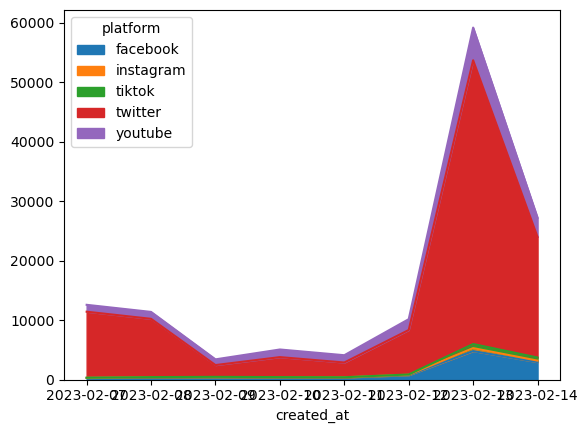

In [19]:

df_b9.plot.area()


<AxesSubplot:xlabel='created_at'>

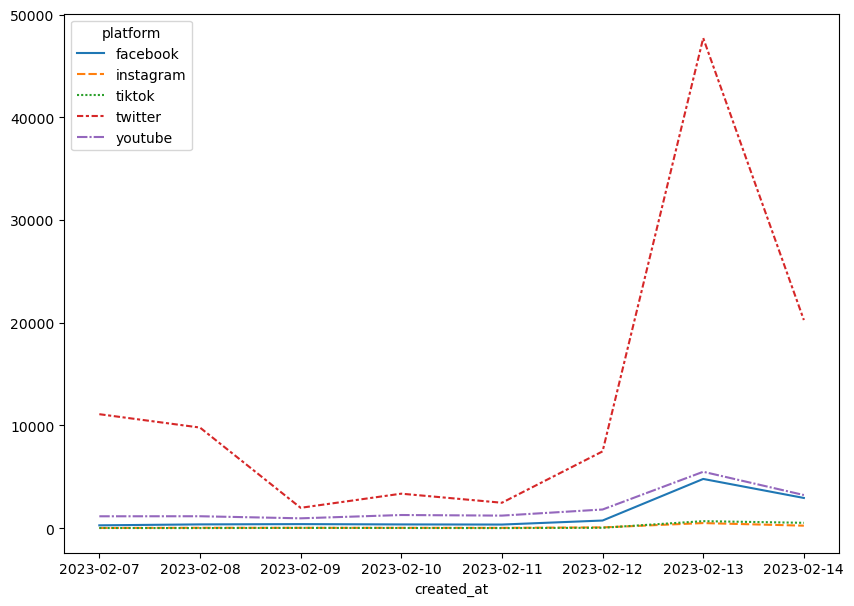

In [20]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df_b9)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133035 entries, 0 to 133034
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   user_id             131904 non-null  object 
 1   ann_emotion         133035 non-null  object 
 2   ann_keyword         124411 non-null  object 
 3   created_at          133035 non-null  object 
 4   engagements         133035 non-null  float64
 5   type                133035 non-null  object 
 6   ann_phrase          91212 non-null   object 
 7   ann_sentiment       133035 non-null  object 
 8   platform            133035 non-null  object 
 9   username            133034 non-null  object 
 10  location_default    4574 non-null    object 
 11  hashtag             27242 non-null   object 
 12  retweeted_username  65418 non-null   object 
 13  user_created_at     104159 non-null  object 
dtypes: float64(1), object(13)
memory usage: 14.2+ MB


# 2 Issue

In [22]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [23]:
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator

In [24]:
df['ann_phrase'] = df['ann_phrase'].str.replace("'", '')

In [25]:
df.ann_phrase

0         [nurani rakyat indonesia, pc dihukum, fs hukum...
1         [tindakan baiquni, pengacara terdakwa obstruct...
2         [partai gerindra, sembako kebutuhan keluarga, ...
3                                                       NaN
4         [pak sambo, ferdy sambo, pak ferdy, orang baik...
                                ...                        
133030                                                  NaN
133031                                                  NaN
133032                                                  NaN
133033                                                  NaN
133034                                                  NaN
Name: ann_phrase, Length: 133035, dtype: object

In [26]:
wordcloud = WordCloud(width=1800, height=800, max_font_size=200, background_color='white')
text = df.ann_phrase[0]
wordcloud = WordCloud().generate(text)
df["ann_phrase"] = df["ann_phrase"].fillna(value="")
word_string=" ".join(df['ann_phrase'].str.lower())

(-0.5, 499.5, 499.5, -0.5)

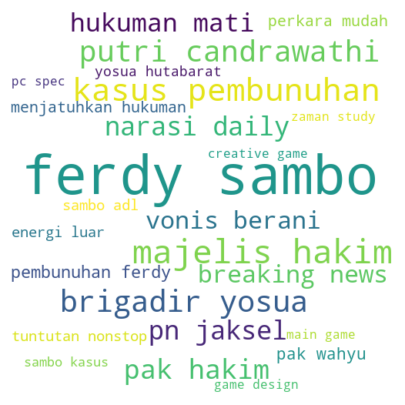

In [180]:
plt.figure(figsize=(20,5))
wc = WordCloud(background_color="white", stopwords = STOPWORDS, max_words=25, max_font_size= 70,  width=500, height=500)
wc.generate(word_string)

plt.imshow(wc.recolor( colormap= 'viridis' , random_state=17), interpolation="bilinear")
plt.axis('off')

# 3 active account

In [28]:
df_a=df[['created_at','user_id']]

In [29]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133035 entries, 0 to 133034
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   created_at  133035 non-null  object
 1   user_id     131904 non-null  object
dtypes: object(2)
memory usage: 2.0+ MB


In [30]:
df_a['created_at'] = pd.to_datetime(df_a.created_at)

C:\Users\eBdesk\AppData\Local\Temp\ipykernel_14808\883390222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['created_at'] = pd.to_datetime(df_a.created_at)


In [31]:
df_a['created_at']=df_a['created_at'].dt.date

C:\Users\eBdesk\AppData\Local\Temp\ipykernel_14808\445899167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['created_at']=df_a['created_at'].dt.date


In [32]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133035 entries, 0 to 133034
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   created_at  133035 non-null  object
 1   user_id     131904 non-null  object
dtypes: object(2)
memory usage: 2.0+ MB


In [33]:
df_a1=df_a['created_at'].value_counts()

In [34]:
df_a1=pd.DataFrame(df_a1)

In [35]:
df_a1=df_a1.reset_index()

In [36]:
df_a1

,index,created_at
0,2023-02-13,59179
1,2023-02-14,27197
2,2023-02-07,12571
3,2023-02-08,11376
4,2023-02-12,10155
5,2023-02-10,5059
6,2023-02-11,4096
7,2023-02-09,3402


In [37]:
df_a1.rename( columns={'created_at':'count'}, inplace=True )

In [38]:
df_a1.rename( columns={'index':'created_at'}, inplace=True )

In [39]:
df_a1

,created_at,count
0,2023-02-13,59179
1,2023-02-14,27197
2,2023-02-07,12571
3,2023-02-08,11376
4,2023-02-12,10155
5,2023-02-10,5059
6,2023-02-11,4096
7,2023-02-09,3402


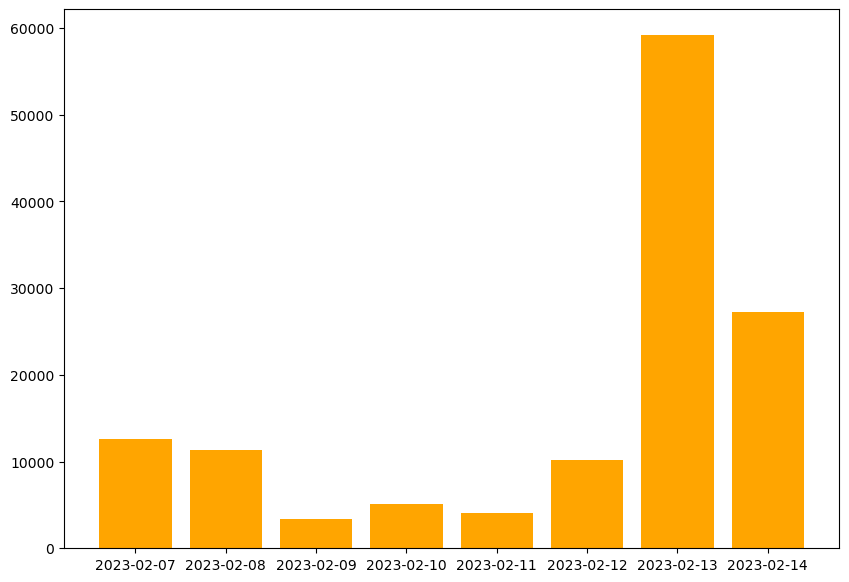

In [40]:
plt.figure(figsize=(10,7))
df_sorted = df_a1.sort_values('created_at')
plt.bar('created_at', 'count', data=df_sorted, color='orange')
plt.show()

# 4 USER CREATED TIME (TWITTER)

In [41]:
df_uct=df[['user_created_at','user_id']]

In [42]:
df_uct['user_created_at'] = pd.to_datetime(df_uct.user_created_at)

C:\Users\eBdesk\AppData\Local\Temp\ipykernel_14808\1488527993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uct['user_created_at'] = pd.to_datetime(df_uct.user_created_at)


In [43]:
df_uct=df_uct.dropna()

In [44]:
df_uct['user_created_at']=df_uct['user_created_at'].dt.year

In [45]:
df_uct

,user_created_at,user_id
11,2021,1435600822604234758
12,2020,1220750507804770306
14,2020,1220750507804770306
16,2015,2963813285
17,2022,1582873572409679872
...,...,...
133027,2012,627782408
133028,2010,195070852
133031,2022,1507597565914935296
133032,2021,1369643516490477568


In [46]:
df_uct1=df_uct['user_created_at'].value_counts(ascending=True)

In [47]:
df_uct1

2006        6
2007       57
2008      366
2023     2451
2015     2566
2016     3092
2014     3259
2017     3512
2013     4106
2010     4338
2018     4594
2009     4597
2011     4966
2012     5366
2019     7558
2020    13031
2021    17888
2022    22406
Name: user_created_at, dtype: int64

<AxesSubplot:>

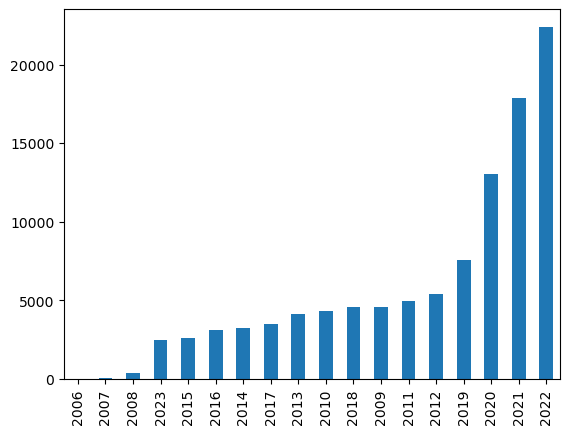

In [48]:
df_uct1.plot.bar()

# 5 engagements history 

In [49]:
df_c=df[['created_at','engagements']]

In [50]:
df_c['created_at'] = pd.to_datetime(df_c.created_at, format='%Y/%m/%d')

C:\Users\eBdesk\AppData\Local\Temp\ipykernel_14808\2270298178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c['created_at'] = pd.to_datetime(df_c.created_at, format='%Y/%m/%d')


<AxesSubplot:xlabel='created_at'>

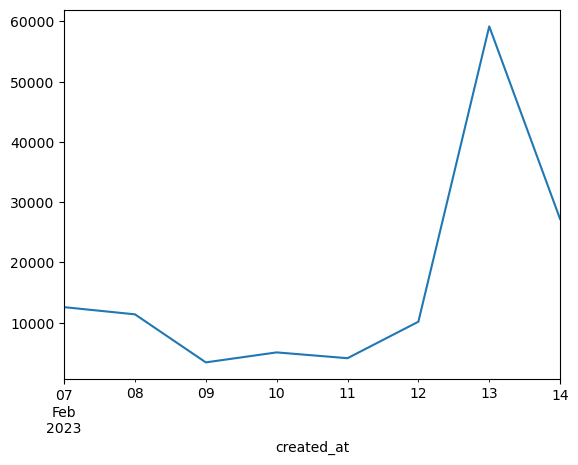

In [51]:

df_c.resample('D', on='created_at')['engagements'].count().plot()

 # 6 total post

In [52]:
df_post=df[df['type']=='post']

In [53]:
total_post=df_post['platform'].value_counts()

In [54]:
total_post=pd.DataFrame(total_post)
total_post=total_post.drop('helo')

In [55]:
total_post

,platform
twitter,95970
facebook,4964
youtube,3149
instagram,970
tiktok,199


# 7 total replies

In [56]:
df_comment=df[df['type']=='comment']


In [57]:
total_com=df_comment['platform'].value_counts()


In [58]:
total_com=pd.DataFrame(total_com)

In [59]:

total_com

,platform
youtube,13175
twitter,8189
facebook,5279
tiktok,1130
instagram,6


# 9 Sentiment

In [60]:
df_sen=df[['created_at','ann_sentiment']]

In [61]:
df_sen['created_at']=pd.to_datetime(df_sen.created_at)

C:\Users\eBdesk\AppData\Local\Temp\ipykernel_14808\1869001870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sen['created_at']=pd.to_datetime(df_sen.created_at)


In [62]:
df_sen['created_at']=df_sen['created_at'].dt.date

C:\Users\eBdesk\AppData\Local\Temp\ipykernel_14808\2754436423.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sen['created_at']=df_sen['created_at'].dt.date


In [63]:
df_sen1=df_sen.value_counts()

In [64]:
df_sen1=df_sen1.to_frame()

In [65]:
df_sen1.reset_index()

,created_at,ann_sentiment,0
0,2023-02-13,negative,27061
1,2023-02-13,positive,19169
2,2023-02-13,neutral,12949
3,2023-02-14,positive,10877
4,2023-02-14,negative,10168
5,2023-02-07,neutral,6407
6,2023-02-14,neutral,6152
7,2023-02-08,neutral,5724
8,2023-02-12,neutral,4397
9,2023-02-07,positive,3899


In [66]:
df_sen1.rename( columns={0:'counts'}, inplace=True )

In [67]:
df_sen1=df_sen1.reset_index()

In [68]:
df_sen2 = df_sen1.pivot("created_at","ann_sentiment","counts")
df_sen2.head(8)

ann_sentiment,negative,neutral,positive
created_at,,,
2023-02-07,2265,6407,3899
2023-02-08,2084,5724,3568
2023-02-09,880,1366,1156
2023-02-10,1258,2051,1750
2023-02-11,1189,1755,1152
2023-02-12,2272,4397,3486
2023-02-13,27061,12949,19169
2023-02-14,10168,6152,10877


<AxesSubplot:xlabel='created_at'>

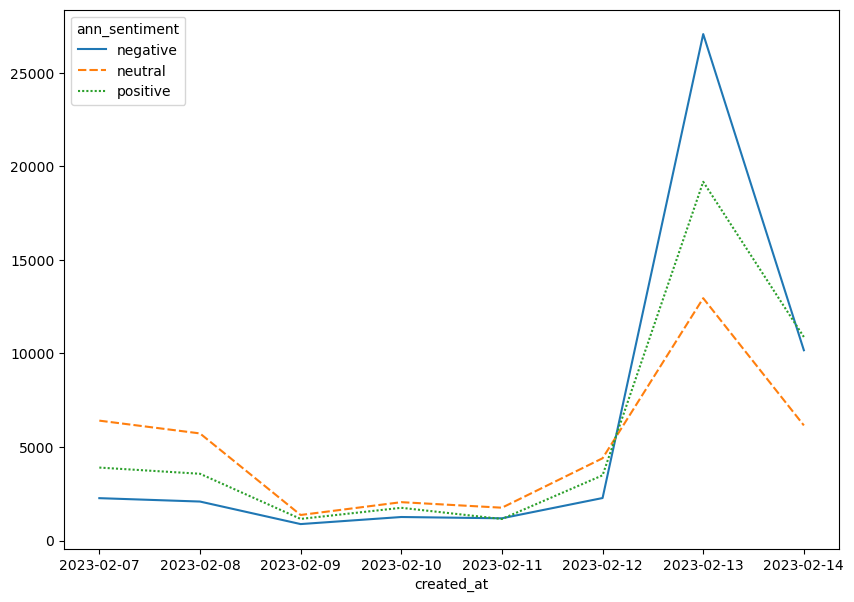

In [69]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df_sen2)

# 10 SENTIMENT PROPORTION

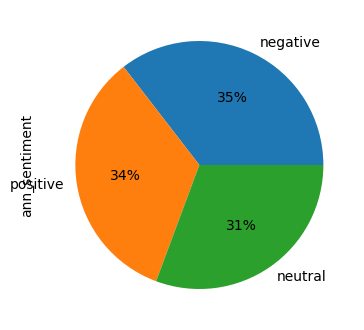

In [70]:
df3=df['ann_sentiment'].value_counts()
plt.figure(figsize=(4,6))
df3.plot(kind='pie',autopct='%1.0f%%')
plt.show()

# 11 Preception Stream

In [71]:
df_ps=df[['created_at','ann_emotion']]

In [72]:
df_ps['created_at'] = pd.to_datetime(df_ps.created_at)

C:\Users\eBdesk\AppData\Local\Temp\ipykernel_14808\2343287752.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ps['created_at'] = pd.to_datetime(df_ps.created_at)


In [73]:
df_ps['created_at']=df_ps['created_at'].dt.date

C:\Users\eBdesk\AppData\Local\Temp\ipykernel_14808\430581905.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ps['created_at']=df_ps['created_at'].dt.date


In [74]:
df_ps=df_ps.value_counts()

In [75]:
df_ps.to_frame()

0
created_at ann_emotion        
2023-02-13 neutral       30323
2023-02-14 neutral       10405
2023-02-13 anticipation   9738
2023-02-14 anticipation   6770
2023-02-07 neutral        6528
...                        ...
           fear             68
2023-02-09 sadness          65
2023-02-10 fear             61
2023-02-09 fear             28
2023-02-11 fear             27

[72 rows x 1 columns]

In [76]:
df_ps=df_ps.reset_index()

In [77]:
df_ps.rename( columns={0:'count'}, inplace=True )

In [78]:
df_ps

,created_at,ann_emotion,count
0,2023-02-13,neutral,30323
1,2023-02-14,neutral,10405
2,2023-02-13,anticipation,9738
3,2023-02-14,anticipation,6770
4,2023-02-07,neutral,6528
...,...,...,...
67,2023-02-07,fear,68
68,2023-02-09,sadness,65
69,2023-02-10,fear,61
70,2023-02-09,fear,28


In [79]:
df_ps2 = df_ps.pivot("created_at","ann_emotion","count")
del(df_ps2["neutral"])
df_ps2.head(8)

ann_emotion,anger,anticipation,disgust,fear,joy,sadness,surprise,trust
created_at,,,,,,,,
2023-02-07,352,2841,509,68,718,152,318,1085
2023-02-08,370,2946,478,73,540,174,346,878
2023-02-09,204,590,278,28,124,65,100,419
2023-02-10,332,1222,318,61,203,95,224,594
2023-02-11,283,993,294,27,157,87,133,426
2023-02-12,457,2926,416,75,315,163,327,987
2023-02-13,3428,9738,2264,373,1627,1145,3965,6316
2023-02-14,1521,6770,1407,170,885,732,1834,3473


<AxesSubplot:xlabel='created_at'>

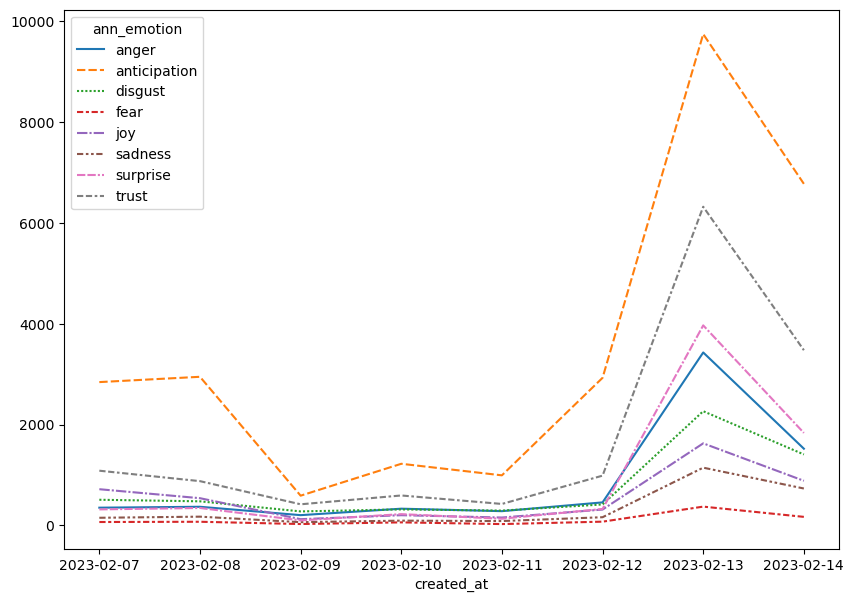

In [80]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df_ps2)

# 12 PERCEPTION RADAR

In [226]:
import plotly.express as px
import time

In [227]:
df_r=df[['ann_emotion']].value_counts()

In [228]:
del(df_r["neutral"])
df_r.to_frame()

,0
ann_emotion,
anticipation,28026
trust,14178
surprise,7247
anger,6947
disgust,5964
joy,4569
sadness,2613
fear,875


In [229]:
df_r=df_r.reset_index()

In [230]:
df_r.rename(columns={0:'count'}, inplace =True)

In [279]:
df_r

,ann_emotion,count
0,anticipation,28026
1,trust,14178
2,surprise,7247
3,anger,6947
4,disgust,5964
5,joy,4569
6,sadness,2613
7,fear,875


In [278]:
t1 = time.time()
fig = px.line_polar(df_r, r='count', theta='ann_emotion', line_close=True)
fig.show()


C:\Users\eBdesk\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



# 13 Hashtag

In [87]:
import json

In [88]:
df_has=df[['hashtag']].value_counts().head(8)

In [89]:
df_has=df_has.to_frame()

In [90]:
df_has

,0
hashtag,
"['KoranTempo', 'FerdySambo']",1679
['BREAKINGNEWS'],1401
['WantedDead'],1167
['BreakingNews'],701
"['news', 'breakingnews', 'vonissambo', 'focus']",497
"['SidangVonisPutriCandrawathi', 'VonisSambodiKompasTV']",486
"['SidangVonisSambo', 'VonisSambodiKompasTV']",471
"['SikatSindikat', 'BP2MI']",364


In [91]:
df_has=df_has.reset_index()

In [92]:
df_has.rename( columns={0:'count'}, inplace=True )

In [93]:
df_has['hashtag'][0][2:-2].split(',')

["KoranTempo'", " 'FerdySambo"]

In [94]:
json.loads(df_has['hashtag'][0].replace("'",'"'))

['KoranTempo', 'FerdySambo']

In [95]:
df_has['hashtag'] = df_has['hashtag'].apply(lambda x: json.loads(x.replace("'",'"')))

In [96]:
df_has['hashtag']

0                             [KoranTempo, FerdySambo]
1                                       [BREAKINGNEWS]
2                                         [WantedDead]
3                                       [BreakingNews]
4              [news, breakingnews, vonissambo, focus]
5    [SidangVonisPutriCandrawathi, VonisSambodiKomp...
6             [SidangVonisSambo, VonisSambodiKompasTV]
7                               [SikatSindikat, BP2MI]
Name: hashtag, dtype: object

In [97]:
df_has
df_has = df_has.explode('hashtag')

# Mengembalikan kolom 'hashtag' menjadi list
df_has = df_has.groupby(level=0)['hashtag'].apply(list)

In [98]:
df_has

0                             [KoranTempo, FerdySambo]
1                                       [BREAKINGNEWS]
2                                         [WantedDead]
3                                       [BreakingNews]
4              [news, breakingnews, vonissambo, focus]
5    [SidangVonisPutriCandrawathi, VonisSambodiKomp...
6             [SidangVonisSambo, VonisSambodiKompasTV]
7                               [SikatSindikat, BP2MI]
Name: hashtag, dtype: object

# 14 MOST RETWEET ACCOUNTS

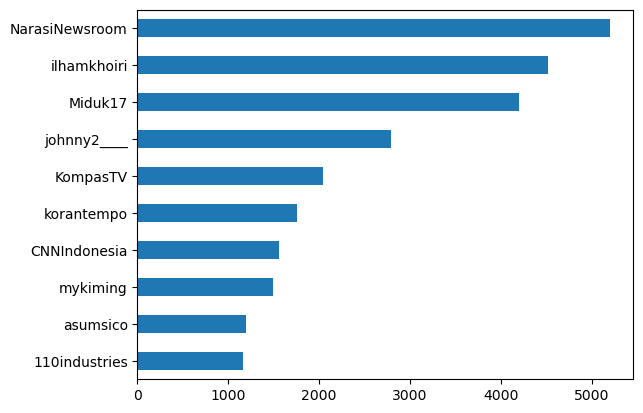

<Figure size 700x500 with 0 Axes>

In [106]:
df_ra=df['retweeted_username'].value_counts(ascending = True).tail(10)
df_ra.plot(kind='barh')
plt.figure(figsize=(7,5))
plt.show()

# 15 Total Post Comparison

In [107]:
df_tpc=df[['created_at','type']]

In [108]:
df_tpc

,created_at,type
0,2023-02-11 23:59:58,comment
1,2023-02-08 23:59:51,post
2,2023-02-10 23:59:34,comment
3,2023-02-08 23:59:36,comment
4,2023-02-10 23:59:29,comment
...,...,...
133030,2023-02-08 13:33:40,post
133031,2023-02-08 01:35:36,post
133032,2023-02-08 14:01:02,post
133033,2023-02-08 08:07:42,comment


In [109]:
df_tpc['created_at'] = pd.to_datetime(df_tpc.created_at, format='%Y/%m/%d')

C:\Users\eBdesk\AppData\Local\Temp\ipykernel_14808\1237191430.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [110]:
df_tpc['created_at']=df_tpc['created_at'].dt.date

C:\Users\eBdesk\AppData\Local\Temp\ipykernel_14808\188147377.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [111]:
df_tpc=df_tpc.value_counts()

In [112]:
df_tpc.to_frame()

,,0
created_at,type,
2023-02-13,post,49475
2023-02-14,post,20841
2023-02-07,post,9947
2023-02-13,comment,9704
2023-02-08,post,8667
2023-02-12,post,7720
2023-02-14,comment,6356
2023-02-10,post,3575
2023-02-11,post,2774


In [113]:
df_tpc1=df_tpc.reset_index()

In [114]:
df_tpc1.rename(columns={0:'count'}, inplace=True )

In [115]:
df_tpc1

,created_at,type,count
0,2023-02-13,post,49475
1,2023-02-14,post,20841
2,2023-02-07,post,9947
3,2023-02-13,comment,9704
4,2023-02-08,post,8667
5,2023-02-12,post,7720
6,2023-02-14,comment,6356
7,2023-02-10,post,3575
8,2023-02-11,post,2774
9,2023-02-08,comment,2709


In [116]:
df_tpc2 = df_tpc1.pivot("created_at", "type", "count")
df_tpc2.head(8)

type,comment,post
created_at,,
2023-02-07,2624,9947
2023-02-08,2709,8667
2023-02-09,1145,2257
2023-02-10,1484,3575
2023-02-11,1322,2774
2023-02-12,2435,7720
2023-02-13,9704,49475
2023-02-14,6356,20841


<AxesSubplot:xlabel='created_at'>

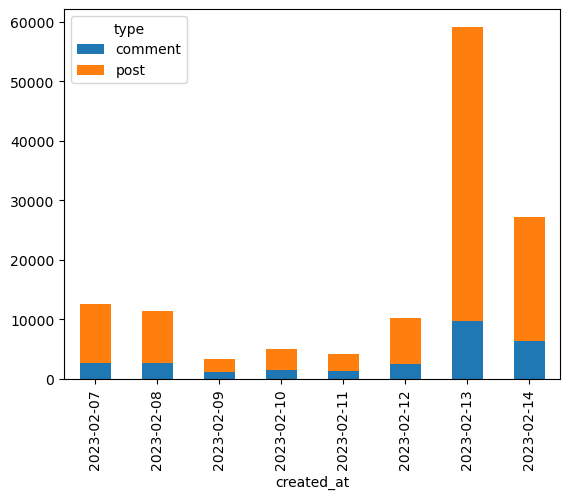

In [117]:
df_tpc2.plot.bar(stacked=True)

# 16 TOP ACCOUNTS COMMENT/REPLY

In [118]:
df_comment=df[df['type']=='comment']

In [119]:
df_comment['username'].value_counts()

arkana love papa     95
Tribunnews           56
moonjaeil97          44
JordanJoseck         40
Nyonya Simatupang    38
                     ..
srilowatia            1
E Shopius Shopius     1
mistantics            1
Arsyad Cahyadi        1
nandawell5            1
Name: username, Length: 18760, dtype: int64

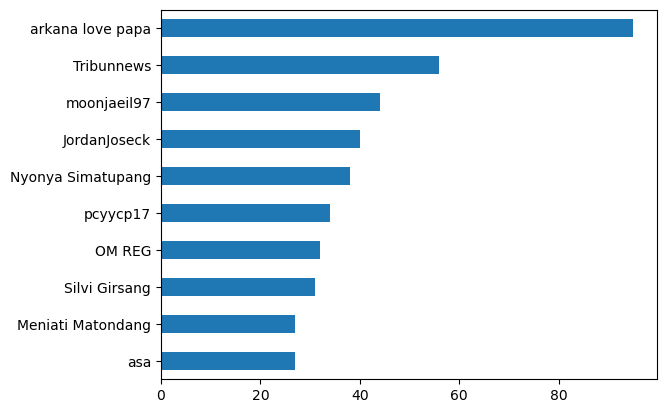

<Figure size 700x500 with 0 Axes>

In [120]:
data5 = df_comment['username'].value_counts(ascending = True).tail(10)
data5.plot(kind='barh')
plt.figure(figsize=(7,5))
plt.show() 
     

# 17 Top Akun Retweet

In [121]:
df_tar= pd.read_csv('data2.csv')

In [122]:
df_tar

,sub_type,username
0,video,KompasTV
1,tweet,Toto_1945
2,tweet,budhedari
3,comment,user4537231143500
4,tweet,PriaWangiLemon
...,...,...
135560,comment,Yunara Offcx 54
135561,tweet,ethernalgo_
135562,tweet,jupiteraiurs
135563,post,jpmtelevisi


In [123]:
df_retweet=df_tar[df_tar['sub_type']=='retweet']

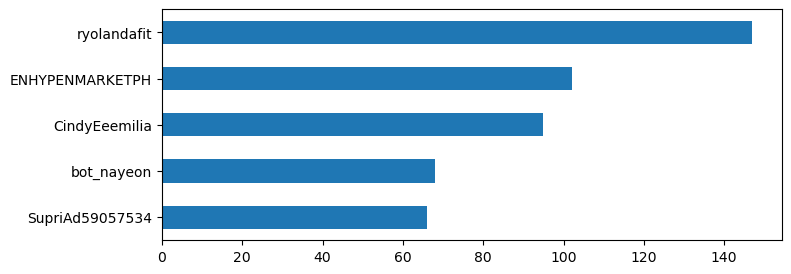

In [124]:
data7 = df_retweet['username'].value_counts(ascending = True).tail(5)
plt.figure(figsize=(8,3))
data7.plot(kind='barh')

plt.show() 
     

# 7 TOPIC LOCATION

In [125]:
data=pd.read_csv("data4.csv")

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135820 entries, 0 to 135819
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   location_default  7774 non-null   object
dtypes: object(1)
memory usage: 1.0+ MB


In [127]:
data=data.dropna()

In [128]:
data

,location_default
2,{'province_name': 'daerah istimewa yogyakarta'}
4,{'province_name': 'dki jakarta'}
19,"{'city_coordinate': '-5.7985265,106.5071981', ..."
29,"{'city_coordinate': '-8.1844859,113.6680747', ..."
33,"{'city_coordinate': '3.60,98.67', 'province_na..."
...,...
135799,"{'city_coordinate': '-6.2474466,107.1484521', ..."
135800,"{'city_coordinate': '-6.2474466,107.1484521', ..."
135801,{'province_name': 'jawa barat'}
135802,{'province_name': 'jawa tengah'}


In [129]:
df = pd.DataFrame(data)

df['location_default'] = df['location_default'].apply(lambda x: eval(x))

province_names = df['location_default'].apply(lambda x: x.get('province_name') if 'province_name' in x else None)
city_coordinates = df['location_default'].apply(lambda x: x.get('city_coordinate') if 'city_coordinate' in x else None)

new_df = pd.DataFrame({'province_name': province_names, 'city_coordinate': city_coordinates})

In [130]:
new_df

,province_name,city_coordinate
2,daerah istimewa yogyakarta,None
4,dki jakarta,None
19,dki jakarta,"-5.7985265,106.5071981"
29,jawa timur,"-8.1844859,113.6680747"
33,sumatera utara,"3.60,98.67"
...,...,...
135799,jawa barat,"-6.2474466,107.1484521"
135800,jawa barat,"-6.2474466,107.1484521"
135801,jawa barat,None
135802,jawa tengah,None


In [131]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7774 entries, 2 to 135804
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   province_name    7569 non-null   object
 1   city_coordinate  5049 non-null   object
dtypes: object(2)
memory usage: 182.2+ KB


In [132]:
count=new_df['province_name'].value_counts()

In [133]:
count=pd.DataFrame(count)

In [134]:
count=count.reset_index()

In [135]:
count.rename( columns={'province_name':'count'}, inplace=True )

In [136]:
count.rename( columns={'index':'province_name'}, inplace=True )

In [137]:
count['province_name']=count['province_name'].str.title()

In [138]:
count["province_name"] = count["province_name"].replace({"Dki Jakarta": "Jakarta Raya"})

In [139]:
count

,province_name,count
0,Jakarta Raya,2023
1,Jawa Barat,1002
2,Jawa Timur,918
3,Jawa Tengah,640
4,Sumatera Utara,472
5,Riau,316
6,Aceh,299
7,Daerah Istimewa Yogyakarta,282
8,Sulawesi Selatan,181
9,Banten,159


In [140]:
pip install pandas shapely fiona pyproj rtree geopandas


Note: you may need to restart the kernel to use updated packages.


In [141]:
import urllib.request
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import six

In [142]:
df_geo = gpd.read_file('https://raw.githubusercontent.com/bimaputra1/School_Partitipation_Rates_with_GeoPandas/master/gadm36_IDN_1.json')

In [143]:
df_join = df_geo.merge(count, how='inner', left_on='NAME_1', right_on='province_name')
df_join = df_join[['province_name', 'count','geometry']]

In [144]:
df_join

,province_name,count,geometry
0,Aceh,299,"MULTIPOLYGON (((96.66509 2.12018, 96.66765 2.1..."
1,Bali,62,"MULTIPOLYGON (((115.59464 -8.81672, 115.59444 ..."
2,Banten,159,"MULTIPOLYGON (((105.54977 -6.99566, 105.55035 ..."
3,Bengkulu,56,"MULTIPOLYGON (((102.37586 -5.36968, 102.38067 ..."
4,Gorontalo,20,"MULTIPOLYGON (((121.41933 0.41357, 121.41941 0..."
5,Jakarta Raya,2023,"MULTIPOLYGON (((106.73563 -6.04014, 106.73548 ..."
6,Jambi,50,"MULTIPOLYGON (((104.40900 -0.85951, 104.40870 ..."
7,Jawa Barat,1002,"MULTIPOLYGON (((108.68501 -6.76990, 108.68410 ..."
8,Jawa Tengah,640,"MULTIPOLYGON (((108.88353 -7.74846, 108.88322 ..."
9,Jawa Timur,918,"MULTIPOLYGON (((114.11237 -8.62003, 114.11220 ..."


In [145]:
df_join.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   province_name  31 non-null     object  
 1   count          31 non-null     int64   
 2   geometry       31 non-null     geometry
dtypes: geometry(1), int64(1), object(1)
memory usage: 992.0+ bytes


In [146]:
df_join['count']=df_join['count'].astype(str)

In [147]:
df_join['Rasio'] = df_join['count'].str.rstrip('%').astype('float')

<AxesSubplot:>

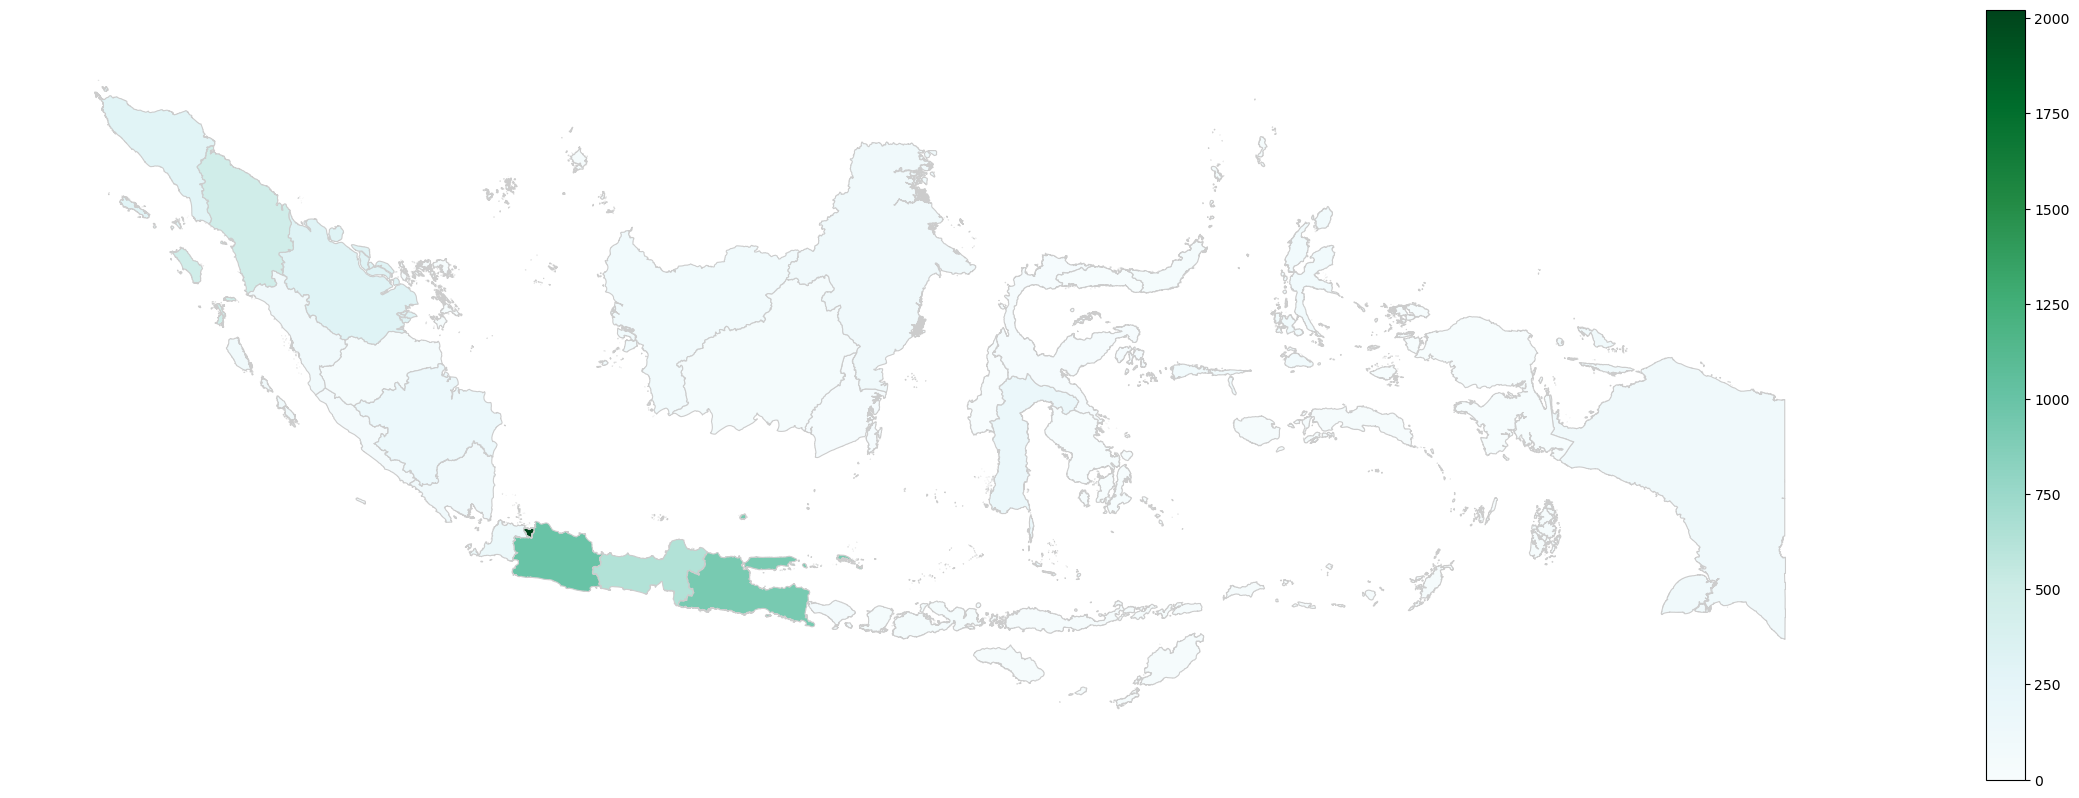

In [148]:
values = 'Rasio'

vmin, vmax = 0, 2023
fig, ax = plt.subplots(1, figsize=(30, 10))
ax.axis('off')


sm = plt.cm.ScalarMappable(cmap='BuGn',
norm=plt.Normalize(vmin=vmin, vmax=vmax))

cbar =  fig.colorbar(sm)
df_join.plot(column=values, cmap='BuGn',
             linewidth=0.8,
             ax=ax,
             edgecolor='0.8',
             norm=plt.Normalize(vmin=vmin, vmax=vmax))

# 12 Hashtag

In [203]:
df_has5=df[['hashtag']]

In [204]:
df_has5=df_has5.dropna()

In [205]:
df_has5

,hashtag
8,"['CEKFAKTATERKINI', 'InewsTebe99', 'KPK', 'Ber..."
9,"['doa', 'anak', 'daging', 'frozen']"
24,['KofiChallenge']
27,['jeansxz_tindera']
31,['DontStarveTogether']
...,...
132973,"['wts', 'zonajajan', 'zonauangᅠᅠᅠ']"
132977,"['play', 'gaming']"
132984,"['Gaspol', 'JernihMelihatDunia', 'GaspolKompas..."
132997,"['akademisi', 'bharadaE', 'brigadiryosua']"


In [206]:
df_has5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27242 entries, 8 to 133030
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   hashtag  27242 non-null  object
dtypes: object(1)
memory usage: 425.7+ KB


In [207]:
df_has5['hashtag'] = df_has5['hashtag'].str.split(',')

In [208]:
df_has5 = df_has5.explode('hashtag')

In [209]:
df_has5['hashtag'] = df_has5['hashtag'].str.replace("[", '')

C:\Users\eBdesk\AppData\Local\Temp\ipykernel_14808\1450456250.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [210]:
df_has5['hashtag'] = df_has5['hashtag'].str.replace("]", '')

C:\Users\eBdesk\AppData\Local\Temp\ipykernel_14808\1395646836.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [211]:
df_has5['hashtag'] = df_has5['hashtag'].str.replace("'", '')

In [212]:
df_has5

,hashtag
8,CEKFAKTATERKINI
8,InewsTebe99
8,KPK
8,BeritaTerkini
8,NAJWASHIHAB
...,...
132997,brigadiryosua
133030,SIDANGYOSUA
133030,BRIGADIRYOSUA
133030,beritatiktok


In [213]:
df_has5.value_counts()

hashtag                 
 FerdySambo                 2413
KoranTempo                  1728
BREAKINGNEWS                1420
 ferdysambo                 1229
WantedDead                  1169
                            ... 
 seleb                         1
 selasa                        1
 cny                           1
 cnyhampers                    1
 proporsionalmencerahkan       1
Length: 13219, dtype: int64

In [214]:
df_has5=df_has5[['hashtag']].value_counts().head(13)

In [215]:
df_has5

hashtag              
 FerdySambo              2413
KoranTempo               1728
BREAKINGNEWS             1420
 ferdysambo              1229
WantedDead               1169
ferdysambo               1031
 VonisSambodiKompasTV     981
 brigadirj                805
 vonissambo               799
BreakingNews              744
 breakingnews             739
 putricandrawathi         602
news                      584
dtype: int64

In [216]:
df_has5=pd.DataFrame(df_has5)

In [217]:
df_has5=df_has5.reset_index()

In [219]:
df_has5.rename( columns={0:'count'}, inplace=True )

In [220]:
df_has5

,hashtag,count
0,FerdySambo,2413
1,KoranTempo,1728
2,BREAKINGNEWS,1420
3,ferdysambo,1229
4,WantedDead,1169
5,ferdysambo,1031
6,VonisSambodiKompasTV,981
7,brigadirj,805
8,vonissambo,799
9,BreakingNews,744


In [221]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


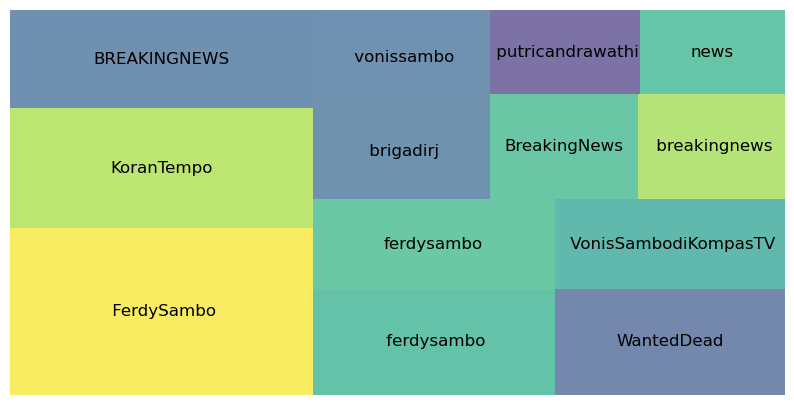

In [225]:
plt.figure(figsize=(10,5))
sb.plot(sizes=df_has5['count'], label=df_has5['hashtag'], alpha=.7,text_kwargs={'fontsize': 12})
plt.axis('off')
plt.show()

In [181]:
df

,user_id,ann_emotion,ann_keyword,created_at,engagements,type,ann_phrase,ann_sentiment,platform,username,location_default,hashtag,retweeted_username,user_created_at
0,UCEtjEUNqYn_K3S5Lou9gpJA,trust,"['peraturan perundang undangan', 'djoko sarwok...",2023-02-11 23:59:58,0.00,comment,"['nurani rakyat indonesia', 'pc dihukum', 'fs ...",positive,youtube,Yeyet Sukayat,NaN,NaN,NaN,NaN
1,177732508945656,disgust,"['tindakan baiquni didasari ancaman', 'perinta...",2023-02-08 23:59:51,2.95,post,"['tindakan baiquni', 'pengacara terdakwa obstr...",negative,facebook,KompasTV,NaN,NaN,NaN,NaN
2,100066692356056,anticipation,"['menuju pilpres', 'tidar jakarta', 'prabowo s...",2023-02-10 23:59:34,0.00,comment,"['partai gerindra', 'sembako kebutuhan keluarg...",positive,facebook,Lenny Zainal,NaN,NaN,NaN,NaN
3,NaN,neutral,NaN,2023-02-08 23:59:36,0.00,comment,NaN,neutral,tiktok,user4537231143500,NaN,NaN,NaN,NaN
4,UCOS9hrDf8HFkbstmX2xJKiQ,trust,"['karir ferdy sambo', 'asset calon pemimpin', ...",2023-02-10 23:59:29,0.00,comment,"['pak sambo', 'ferdy sambo', 'pak ferdy', 'ora...",positive,youtube,Budi Budi,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133030,6894101311173788673,neutral,['eks anak buah ferdy sambo jalani sidang dupl...,2023-02-08 13:33:40,22.60,post,NaN,neutral,tiktok,jpmtelevisi,NaN,"['SIDANGYOSUA', 'BRIGADIRYOSUA', 'beritatiktok...",NaN,NaN
133031,1507597565914935296,neutral,"['cotton place mate', 'nct home round', 'clear...",2023-02-08 01:35:36,7.45,post,NaN,neutral,twitter,ethernalgo_,NaN,NaN,NaN,2022-03-26 05:57:32
133032,1369643516490477568,trust,"['ges dibeli', 'ready ina', 'good condi', 'dom...",2023-02-08 14:01:02,4.35,post,NaN,positive,twitter,chasimjaeyun15_,NaN,NaN,NaN,2021-03-10 13:37:25
133033,NaN,surprise,NaN,2023-02-08 08:07:42,0.00,comment,NaN,positive,tiktok,nandawell5,NaN,NaN,NaN,NaN
